# Logistic Regression (Bank problem)

In [65]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [66]:
data = pd.read_csv("D:/ExcelR/A6 logistic regression/bank-full.csv",sep=';')

In [67]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [68]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [69]:
data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [70]:
data.default.unique()

array(['no', 'yes'], dtype=object)

In [71]:
mydict = {'yes':1,'no':0}

In [72]:
data['default']=data['default'].replace(mydict)

In [73]:
data.housing.unique()

array(['yes', 'no'], dtype=object)

In [74]:
data['housing']=data['housing'].replace(mydict)

In [75]:
data.loan.unique()

array(['no', 'yes'], dtype=object)

In [76]:
data['loan']=data['loan'].replace(mydict)

In [77]:
data.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [78]:
data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [79]:
data.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [80]:
data.y.unique()

array(['no', 'yes'], dtype=object)

In [81]:
data['y']=data['y'].replace(mydict)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [83]:
data2 = pd.get_dummies(data)

In [84]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [85]:
firstcol = data2.pop('y')

In [86]:
data2.insert(loc=0,column='y',value=firstcol)

In [87]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   y                    45211 non-null  int64
 1   age                  45211 non-null  int64
 2   default              45211 non-null  int64
 3   balance              45211 non-null  int64
 4   housing              45211 non-null  int64
 5   loan                 45211 non-null  int64
 6   day                  45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [91]:
data2.describe()

,y,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.116985,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,0.321406,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,0.000000,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
x = data2.iloc[:,1:]
y = data2.iloc[:,0]

In [104]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
y_pred = classifier.predict(x)

In [106]:
y_pred_df = pd.DataFrame({'actual': y,'predicted_prob': y_pred})

In [107]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [108]:
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(y,y_pred)
print (confusionmatrix)

[[39162   760]
 [ 4136  1153]]


In [109]:
((39162+1153)/(39162+1153+760+4136))*100

89.1707770232908

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

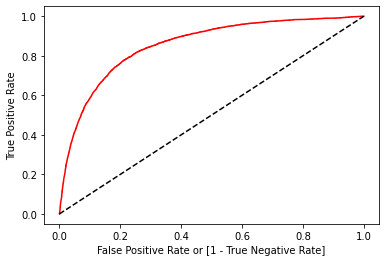

In [123]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y,classifier.predict_proba(x)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [124]:
auc

0.8539552628665791

In [125]:
import seaborn as sns

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


<AxesSubplot:xlabel='age', ylabel='Count'>

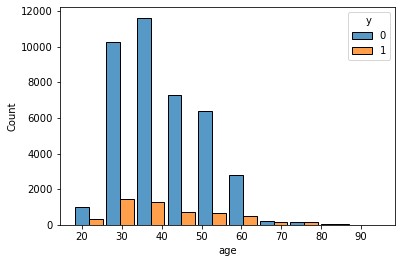

In [134]:
sns.histplot(x=data['age'],bins=10,hue=data['y'],multiple="dodge", shrink=.9)

<AxesSubplot:xlabel='marital', ylabel='Count'>

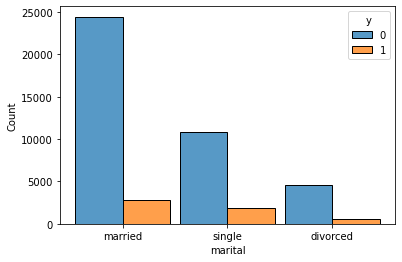

In [135]:
sns.histplot(x=data['marital'],hue=data['y'],multiple="dodge", shrink=.9)

<AxesSubplot:xlabel='education', ylabel='Count'>

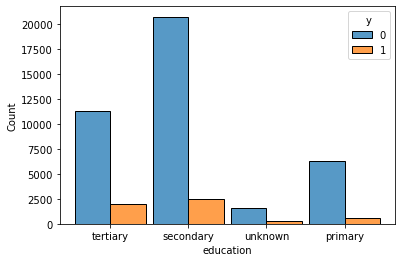

In [136]:
sns.histplot(x=data['education'],hue=data['y'],multiple="dodge", shrink=.9)

<AxesSubplot:xlabel='default', ylabel='Count'>

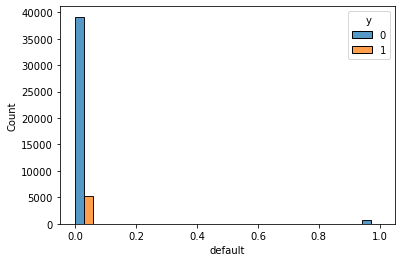

In [138]:
sns.histplot(x=data['default'],hue=data['y'],multiple="dodge")

<AxesSubplot:xlabel='balance', ylabel='Count'>

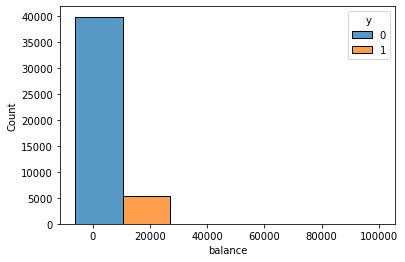

In [142]:
sns.histplot(x=data['balance'],bins=3,hue=data['y'],multiple="dodge", shrink=.9)

<AxesSubplot:xlabel='month', ylabel='Count'>

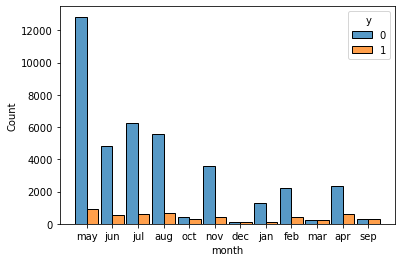

In [143]:
sns.histplot(x=data['month'],hue=data['y'],multiple="dodge", shrink=.9)